# Telco Customer Churn Analysis

This notebook performs a comprehensive descriptive analysis of the Telco Customer Churn dataset to understand patterns and factors affecting customer churn.

## 1. Import Libraries and Load Data

First, let's import the required libraries and load our dataset.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set basic plot style
plt.style.use('default')
sns.set()

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows and basic information about the dataset
print("First few rows of the dataset:")
display(df.head())

print("\nDataset Info:")
display(df.info())

First few rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

None

## 2. Data Preprocessing

Let's clean the data and handle any data type conversions:

In [3]:
# Convert TotalCharges to numeric, handling any spaces
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.strip(), errors='coerce')

# Check for missing values
print("Missing values in the dataset:")
display(df.isnull().sum())

# Convert categorical variables to numeric for correlation analysis
df_encoded = pd.get_dummies(df.drop(['customerID'], axis=1))

# Display basic statistics of numerical columns
print("\nBasic statistics of numerical columns:")
display(df.select_dtypes(include=['int64', 'float64']).describe())

Missing values in the dataset:


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


Basic statistics of numerical columns:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## 3. Customer Demographics Analysis

Let's analyze the customer demographics including gender, senior citizen status, partner status, and dependents.

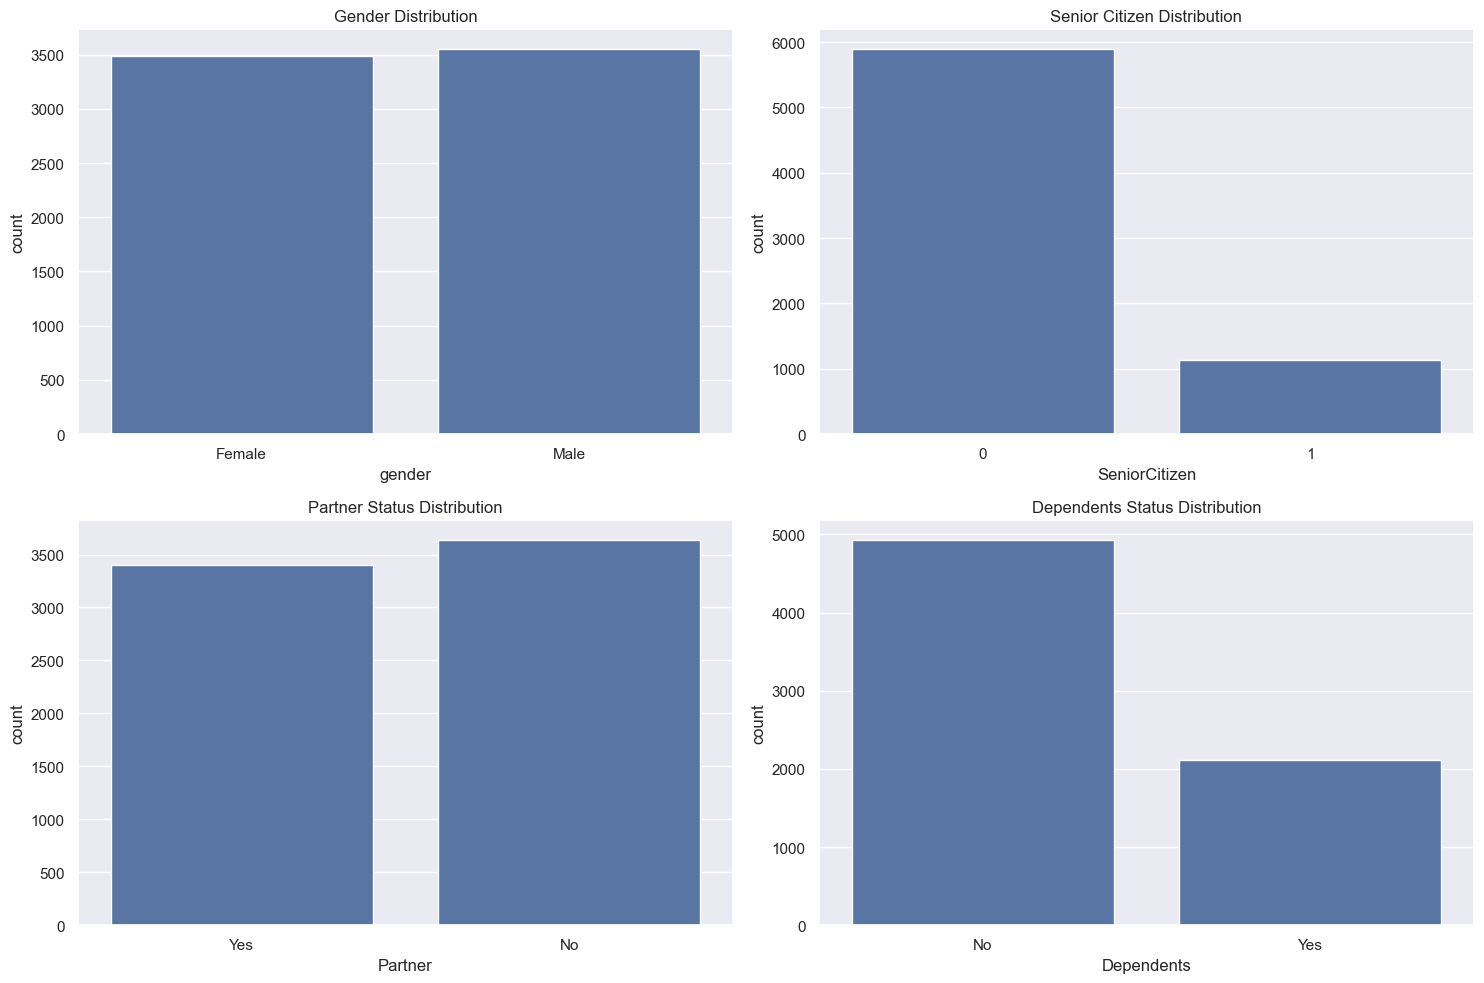


Demographic Percentages:

gender distribution:


gender
Male      50.48
Female    49.52
Name: proportion, dtype: float64


SeniorCitizen distribution:


SeniorCitizen
0    83.79
1    16.21
Name: proportion, dtype: float64


Partner distribution:


Partner
No     51.7
Yes    48.3
Name: proportion, dtype: float64


Dependents distribution:


Dependents
No     70.04
Yes    29.96
Name: proportion, dtype: float64

In [4]:
# Create a figure with multiple subplots
plt.figure(figsize=(15, 10))

# Plot 1: Gender Distribution
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')

# Plot 2: Senior Citizen Distribution
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='SeniorCitizen')
plt.title('Senior Citizen Distribution')

# Plot 3: Partner Status
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Partner')
plt.title('Partner Status Distribution')

# Plot 4: Dependents Status
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='Dependents')
plt.title('Dependents Status Distribution')

plt.tight_layout()
plt.show()

# Calculate percentages for each demographic
print("\nDemographic Percentages:")
demographic_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
for col in demographic_cols:
    print(f"\n{col} distribution:")
    display(df[col].value_counts(normalize=True).mul(100).round(2))

## 4. Services Analysis

Let's analyze the various services subscribed by customers and their relationships.

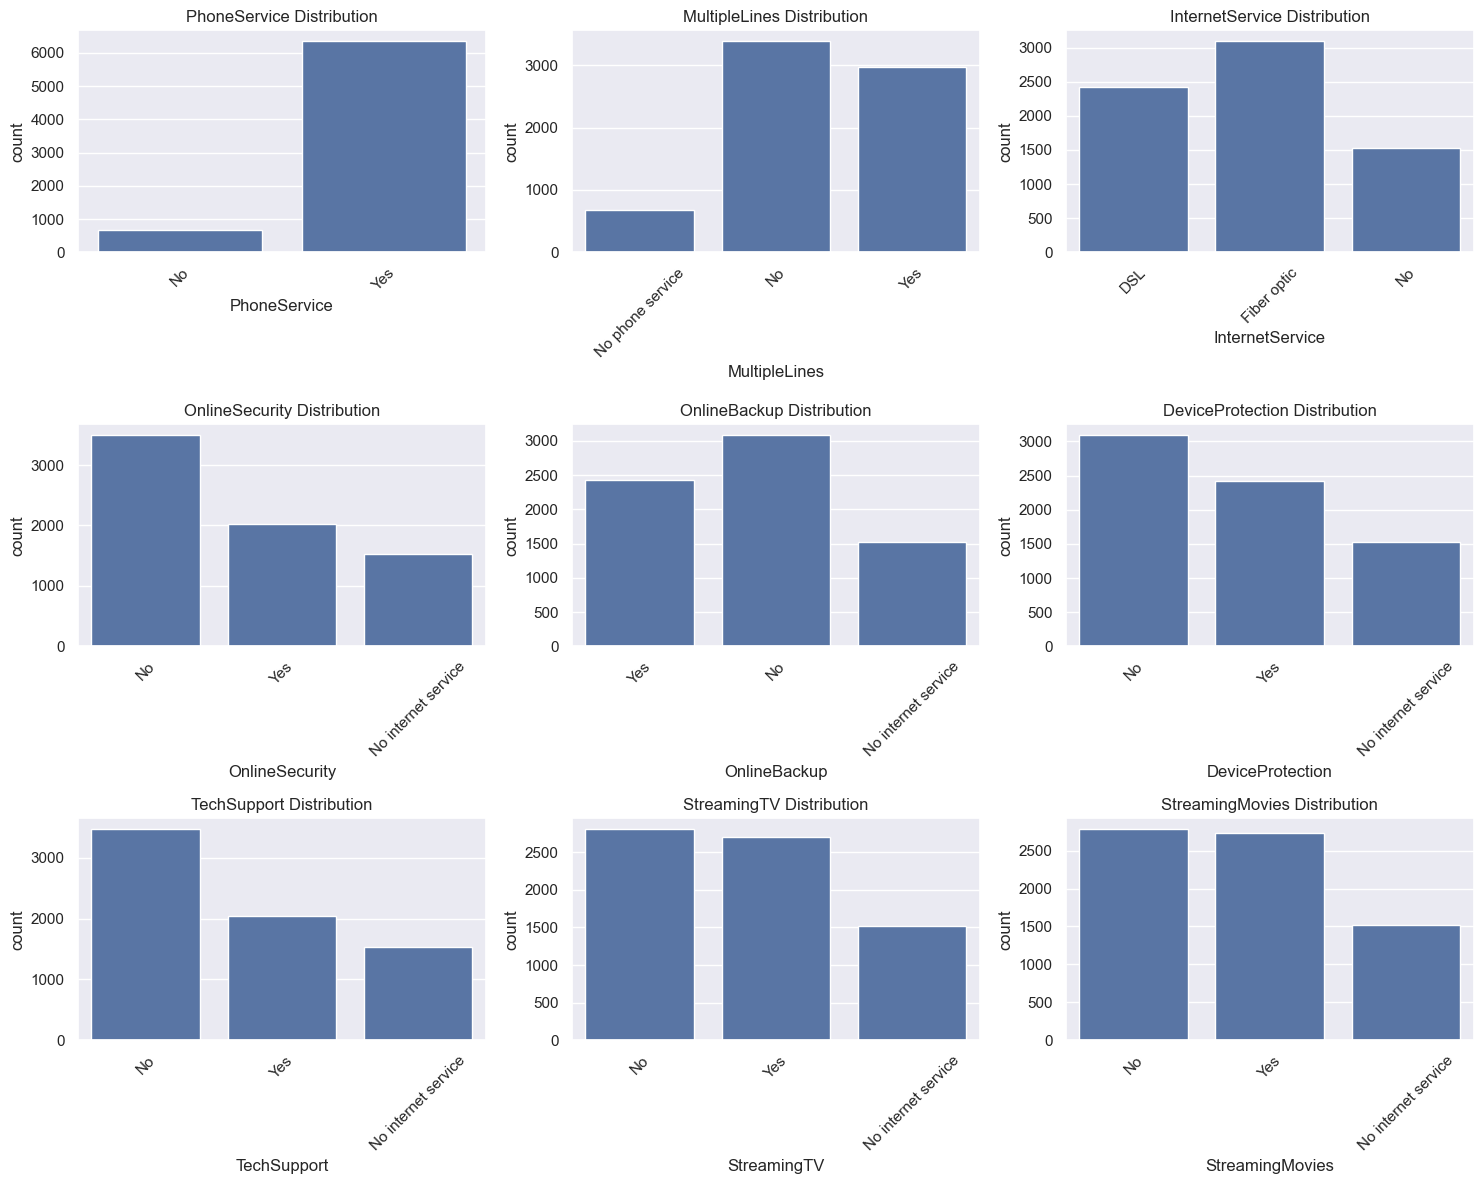


Service Adoption Rates:

PhoneService distribution:


PhoneService
Yes    90.32
No      9.68
Name: proportion, dtype: float64


MultipleLines distribution:


MultipleLines
No                  48.13
Yes                 42.18
No phone service     9.68
Name: proportion, dtype: float64


InternetService distribution:


InternetService
Fiber optic    43.96
DSL            34.37
No             21.67
Name: proportion, dtype: float64


OnlineSecurity distribution:


OnlineSecurity
No                     49.67
Yes                    28.67
No internet service    21.67
Name: proportion, dtype: float64


OnlineBackup distribution:


OnlineBackup
No                     43.84
Yes                    34.49
No internet service    21.67
Name: proportion, dtype: float64


DeviceProtection distribution:


DeviceProtection
No                     43.94
Yes                    34.39
No internet service    21.67
Name: proportion, dtype: float64


TechSupport distribution:


TechSupport
No                     49.31
Yes                    29.02
No internet service    21.67
Name: proportion, dtype: float64


StreamingTV distribution:


StreamingTV
No                     39.90
Yes                    38.44
No internet service    21.67
Name: proportion, dtype: float64


StreamingMovies distribution:


StreamingMovies
No                     39.54
Yes                    38.79
No internet service    21.67
Name: proportion, dtype: float64

In [5]:
# List of service columns
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a figure for service distribution
plt.figure(figsize=(15, 12))

for idx, service in enumerate(service_cols, 1):
    plt.subplot(3, 3, idx)
    sns.countplot(data=df, x=service)
    plt.title(f'{service} Distribution')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calculate and display service adoption rates
print("\nService Adoption Rates:")
for service in service_cols:
    print(f"\n{service} distribution:")
    display(df[service].value_counts(normalize=True).mul(100).round(2))

## 5. Contract and Billing Analysis

Let's analyze the contract types, billing methods, and charges.

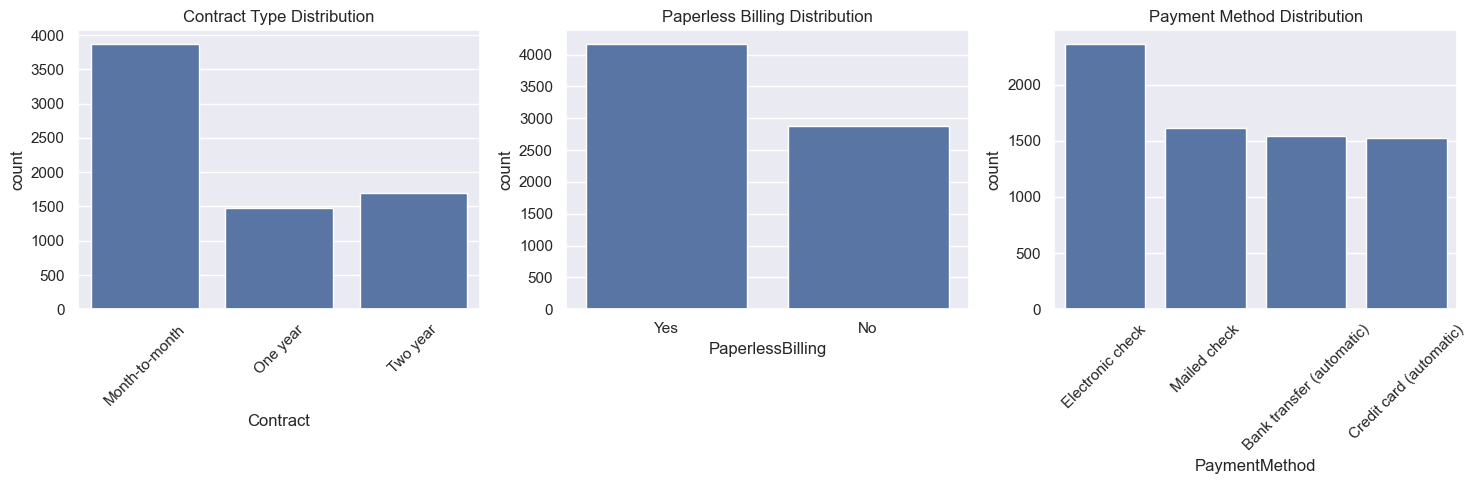


Contract and Billing Statistics:

Contract Type Distribution:


Contract
Month-to-month    55.02
Two year          24.07
One year          20.91
Name: proportion, dtype: float64


Paperless Billing Distribution:


PaperlessBilling
Yes    59.22
No     40.78
Name: proportion, dtype: float64


Payment Method Distribution:


PaymentMethod
Electronic check             33.58
Mailed check                 22.89
Bank transfer (automatic)    21.92
Credit card (automatic)      21.61
Name: proportion, dtype: float64

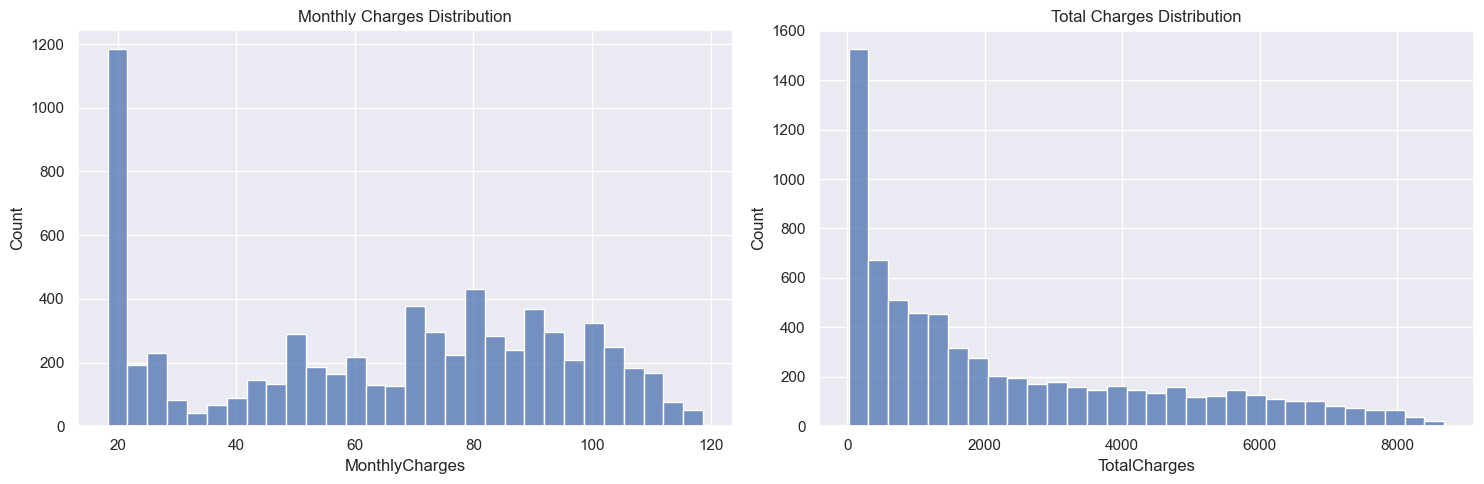


Charges Statistics:


,MonthlyCharges,TotalCharges
count,7043.000000,7032.000000
mean,64.761692,2283.300441
std,30.090047,2266.771362
min,18.250000,18.800000
25%,35.500000,401.450000
50%,70.350000,1397.475000
75%,89.850000,3794.737500
max,118.750000,8684.800000


In [6]:
# Create subplots for contract and billing analysis
plt.figure(figsize=(15, 5))

# Plot 1: Contract Type Distribution
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='Contract')
plt.title('Contract Type Distribution')
plt.xticks(rotation=45)

# Plot 2: Paperless Billing Distribution
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='PaperlessBilling')
plt.title('Paperless Billing Distribution')

# Plot 3: Payment Method Distribution
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='PaymentMethod')
plt.title('Payment Method Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Display billing-related statistics
print("\nContract and Billing Statistics:")
print("\nContract Type Distribution:")
display(df['Contract'].value_counts(normalize=True).mul(100).round(2))

print("\nPaperless Billing Distribution:")
display(df['PaperlessBilling'].value_counts(normalize=True).mul(100).round(2))

print("\nPayment Method Distribution:")
display(df['PaymentMethod'].value_counts(normalize=True).mul(100).round(2))

# Analyze charges
plt.figure(figsize=(15, 5))

# Plot 1: Monthly Charges Distribution
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='MonthlyCharges', bins=30)
plt.title('Monthly Charges Distribution')

# Plot 2: Total Charges Distribution
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='TotalCharges', bins=30)
plt.title('Total Charges Distribution')

plt.tight_layout()
plt.show()

# Display charges statistics
print("\nCharges Statistics:")
display(df[['MonthlyCharges', 'TotalCharges']].describe())

## 6. Churn Analysis

Let's analyze the churn patterns and their relationships with other variables.

Overall Churn Rate:


Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64

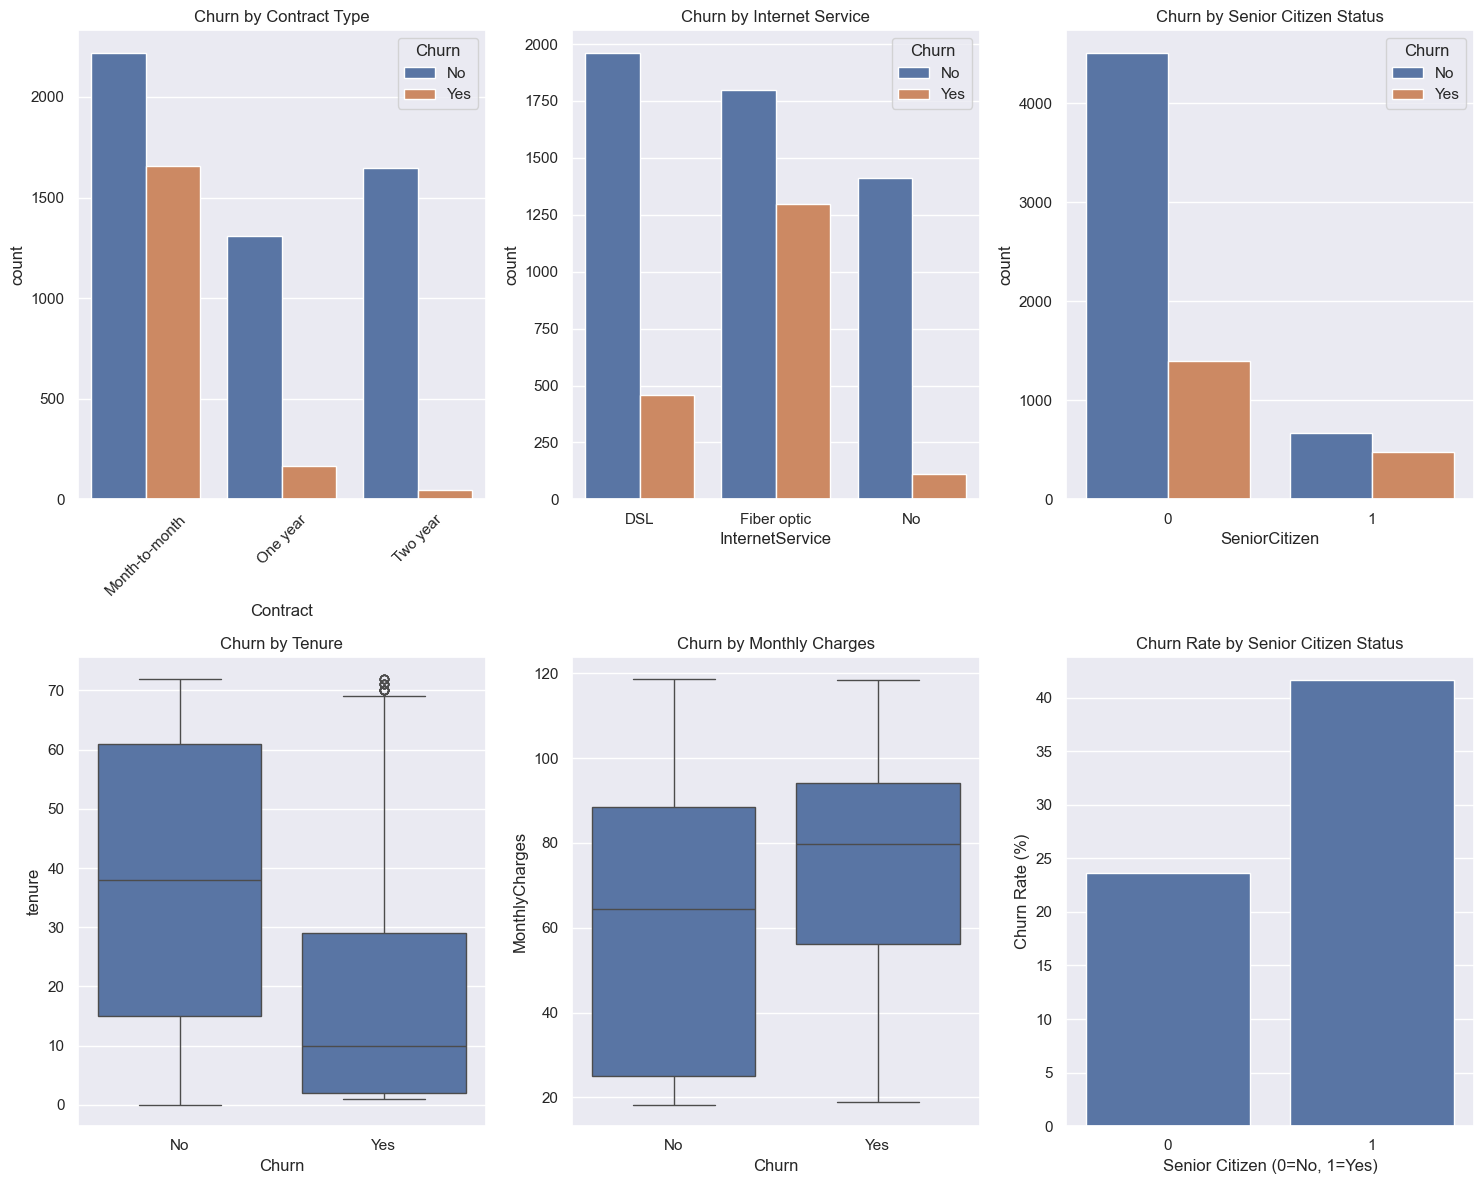


Churn Rates by Different Factors:

Churn Rate by Contract:


Contract
Month-to-month    42.71
One year          11.27
Two year           2.83
Name: Yes, dtype: float64


Churn Rate by InternetService:


InternetService
Fiber optic    41.89
DSL            18.96
No              7.40
Name: Yes, dtype: float64


Churn Rate by PaperlessBilling:


PaperlessBilling
Yes    33.57
No     16.33
Name: Yes, dtype: float64


Churn Rate by PaymentMethod:


PaymentMethod
Electronic check             45.29
Mailed check                 19.11
Bank transfer (automatic)    16.71
Credit card (automatic)      15.24
Name: Yes, dtype: float64


Churn Rate by SeniorCitizen:


SeniorCitizen
1    41.68
0    23.61
Name: Yes, dtype: float64


Detailed Analysis of Senior Citizens:

Internet Service Usage by Senior Citizen Status and Churn (%):


InternetService        DSL  Fiber optic     No
SeniorCitizen Churn                           
0             No     39.51        30.19  30.30
              Yes    27.35        64.90   7.75
1             No     27.18        65.77   7.06
              Yes    16.39        82.56   1.05


Average Monthly Charges by Senior Citizen Status and Churn:


SeniorCitizen  Churn
0              No       58.62
               Yes      72.30
1              No       79.18
               Yes      80.71
Name: MonthlyCharges, dtype: float64

In [8]:
# Overall churn rate
print("Overall Churn Rate:")
display(df['Churn'].value_counts(normalize=True).mul(100).round(2))

# Create figure for churn analysis
plt.figure(figsize=(15, 12))

# Plot 1: Churn by Contract Type
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.xticks(rotation=45)

# Plot 2: Churn by Internet Service
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn by Internet Service')

# Plot 3: Churn by Senior Citizen Status
plt.subplot(2, 3, 3)
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')
plt.title('Churn by Senior Citizen Status')

# Plot 4: Churn by Tenure
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Churn by Tenure')

# Plot 5: Churn by Monthly Charges
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Churn by Monthly Charges')

# Plot 6: Churn Rate by Senior Citizen
plt.subplot(2, 3, 6)
senior_churn = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()
sns.barplot(x=senior_churn.index, y=senior_churn['Yes'] * 100)
plt.title('Churn Rate by Senior Citizen Status')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Senior Citizen (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

# Display churn rates by different factors
factors = ['Contract', 'InternetService', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']
print("\nChurn Rates by Different Factors:")
for factor in factors:
    print(f"\nChurn Rate by {factor}:")
    display(df.groupby(factor)['Churn'].value_counts(normalize=True)
            .mul(100).round(2)
            .unstack()['Yes']
            .sort_values(ascending=False))

# Additional analysis for senior citizens
print("\nDetailed Analysis of Senior Citizens:")
senior_services = pd.crosstab([df['SeniorCitizen'], df['Churn']], 
                            df['InternetService'], 
                            normalize='index') * 100
print("\nInternet Service Usage by Senior Citizen Status and Churn (%):")
display(senior_services.round(2))

# Average monthly charges by senior citizen status and churn
print("\nAverage Monthly Charges by Senior Citizen Status and Churn:")
display(df.groupby(['SeniorCitizen', 'Churn'])['MonthlyCharges'].mean().round(2))

## 7. Key Findings

1. **Overall Churn Rate**: 26.54% of customers have churned, which is a significant percentage that needs attention.

2. **Demographics**:
   - Gender distribution is almost equal (Male: 50.48%, Female: 49.52%)
   - Only 16.21% are senior citizens
   - 48.3% have partners, and 29.96% have dependents
   - Senior citizens show different churn patterns and service preferences

3. **Services**:
   - 90.32% of customers have phone service
   - 78.33% have internet service (43.96% Fiber optic, 34.37% DSL)
   - Streaming services (TV and Movies) are used by about 38% of customers

4. **Contract and Billing**:
   - Most customers (55.02%) are on month-to-month contracts
   - 59.22% use paperless billing
   - Electronic check is the most common payment method (33.58%)
   - Average monthly charges are $64.76

5. **Churn Patterns**:
   - Month-to-month contracts have the highest churn rate (42.71%)
   - Fiber optic internet users have higher churn rates (41.89%)
   - Electronic check users have higher churn rates (45.29%)
   - Customers with paperless billing are more likely to churn (33.57%)
   - Longer tenure customers are less likely to churn
   - Senior citizens tend to have different service preferences and churn patterns

6. **Key Risk Factors for Churn**:
   - Month-to-month contracts
   - Fiber optic internet service
   - Electronic check payment method
   - Shorter tenure
   - Higher monthly charges
   - Age demographic considerations (senior citizen status)

## 8. Feature Engineering and Machine Learning Preparation

Let's prepare our data for machine learning by:
1. Handling categorical variables
2. Feature engineering
3. Splitting the data
4. Scaling numerical features

## Understanding Machine Learning and Feature Engineering

### What is Machine Learning?
Machine Learning is like teaching a computer to make decisions based on past examples, similar to how humans learn from experience. In our case, we want to teach the computer to predict whether a customer is likely to leave (churn) based on their characteristics and behavior.

Think of it like this:
- If you've worked at a phone store, you might notice patterns like "customers with high bills who are on month-to-month contracts often leave"
- Machine learning does this at a much larger scale, looking at all possible patterns in the data
- The computer "learns" these patterns and can then predict if a new customer might leave

### What is Feature Engineering?
Feature engineering is like being a detective - we create new clues (features) from existing information to help solve our mystery (predicting churn). For example:

1. **Simple Features**: Instead of just knowing a customer's total charges and how long they've been a customer, we can calculate their average monthly spending
2. **Combined Features**: We can count how many different services each customer has
3. **Transformed Features**: We can convert text information (like contract type) into numbers the computer can understand

### Why Do We Need to Prepare Data?
Imagine trying to compare apples and oranges:
- You can't directly compare their text descriptions, but you can compare their weights or sizes
- Similarly, we need to convert all our customer information into numbers
- We also need to make sure these numbers are on similar scales (like comparing all fruits in grams rather than mixing grams and pounds)

Let's see how we do this in practice:

In [14]:
# Import required libraries for ML preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# First, let's create a copy of our dataframe
df_ml = df.copy()

# Handle missing values in TotalCharges
# First check if TotalCharges is already numeric
if df_ml['TotalCharges'].dtype == 'object':
    df_ml['TotalCharges'] = pd.to_numeric(df_ml['TotalCharges'].replace(' ', ''), errors='coerce')
df_ml['TotalCharges'].fillna(df_ml['TotalCharges'].mean(), inplace=True)

# Create new features
# 1. Average Monthly Charges (Total Charges / Tenure)
# Add small constant to tenure to avoid division by zero
df_ml['AvgMonthlyCharges'] = df_ml['TotalCharges'] / (df_ml['tenure'] + 0.1)
df_ml['AvgMonthlyCharges'].fillna(df_ml['MonthlyCharges'], inplace=True)

# 2. Charges Difference (Monthly - Average)
df_ml['ChargesDifference'] = df_ml['MonthlyCharges'] - df_ml['AvgMonthlyCharges']

# 3. Services Count (number of services subscribed)
services = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df_ml['ServicesCount'] = df_ml[services].apply(lambda x: 
    sum([1 for item in x if item not in ['No', 'No internet service', 'No phone service']]), axis=1)

# 4. Contract Duration in Months
df_ml['ContractDuration'] = df_ml['Contract'].map({
    'Month-to-month': 1,
    'One year': 12,
    'Two year': 24
})

# Print the new features
print("Newly created features:")
display(df_ml[['AvgMonthlyCharges', 'ChargesDifference', 'ServicesCount', 'ContractDuration']].describe())

Newly created features:


C:\Users\sanjo\AppData\Local\Temp\ipykernel_25960\1291648864.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ml['TotalCharges'].fillna(df_ml['TotalCharges'].mean(), inplace=True)
C:\Users\sanjo\AppData\Local\Temp\ipykernel_25960\1291648864.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

,AvgMonthlyCharges,ChargesDifference,ServicesCount,ContractDuration
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,99.547849,-34.786156,3.724407,8.835865
std,899.697690,900.122297,2.100232,9.551444
min,13.119048,-22813.304408,1.000000,1.000000
25%,35.661202,-0.878266,2.000000,1.000000
50%,68.720174,0.445013,4.000000,1.000000
75%,89.200233,2.071715,5.000000,12.000000
max,22833.004408,21.376190,8.000000,24.000000


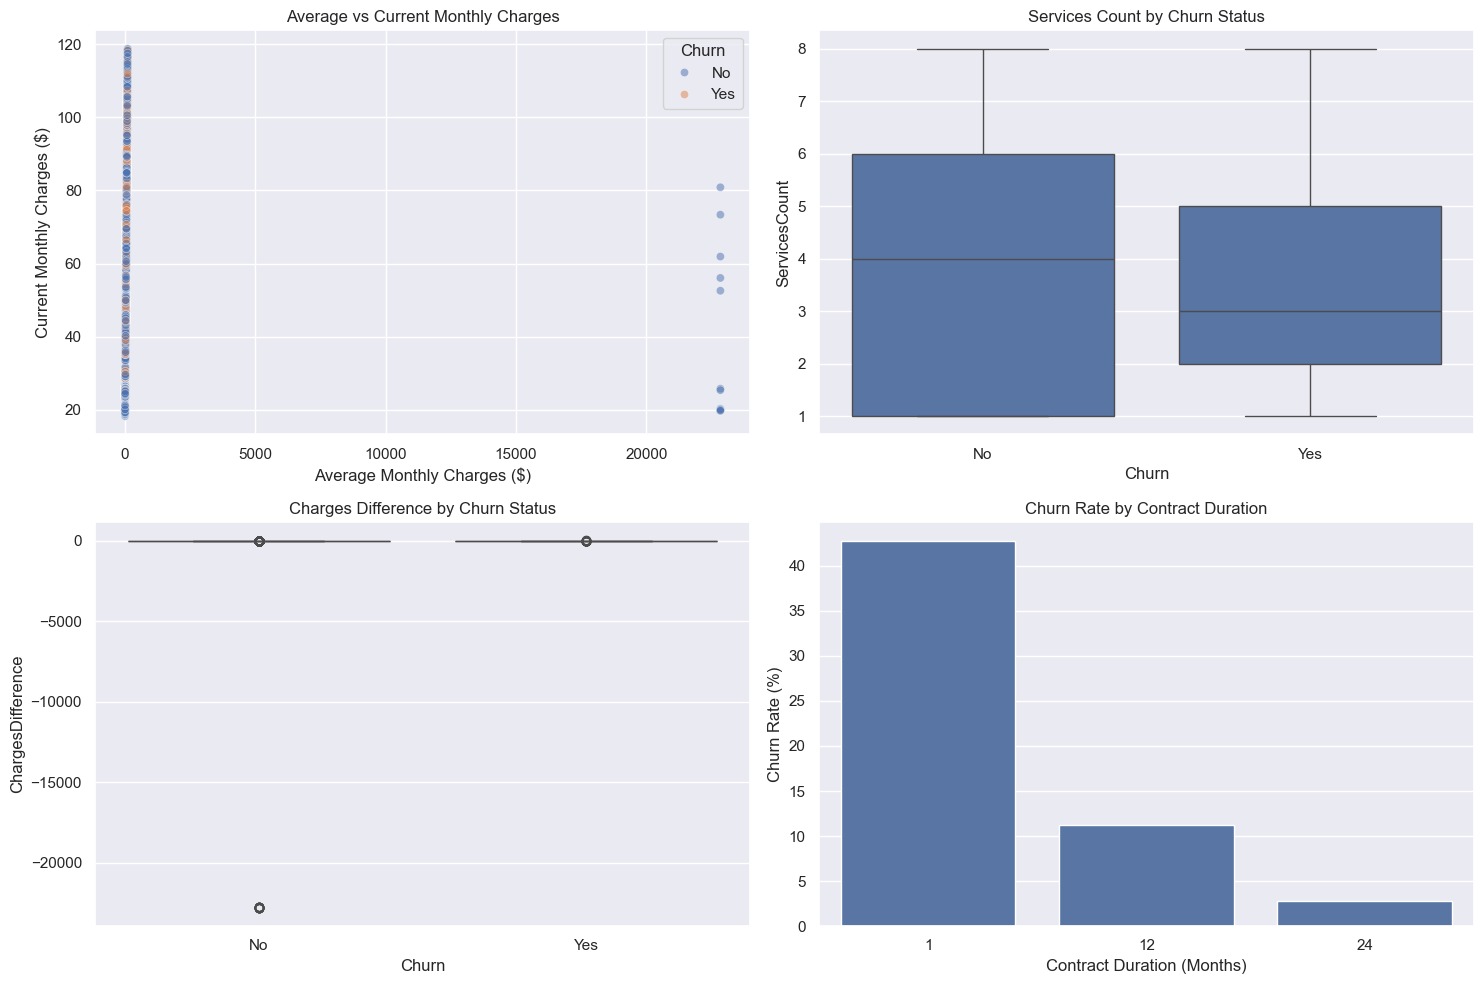


Engineered Features Statistics by Churn Status:


AvgMonthlyCharges                                               \
                  count    mean      std    min    25%    50%    75%   
Churn                                                                  
No               5174.0  109.26  1049.44  13.12  25.19  63.60  87.53   
Yes              1869.0   72.65    25.20  13.48  55.55  77.24  92.62   

                ChargesDifference         ... ServicesCount       \
            max             count   mean  ...           75%  max   
Churn                                     ...                      
No     22833.00            5174.0 -48.00  ...           6.0  8.0   
Yes      120.45            1869.0   1.79  ...           5.0  8.0   

      ContractDuration                                           
                 count   mean   std  min  25%   50%   75%   max  
Churn                                                            
No              5174.0  11.10  9.85  1.0  1.0  12.0  24.0  24.0  
Yes             1869.0   2.57  4.68  1.0  1.0   1.0   1.0  24.0  

[2 rows x 32 columns]

In [11]:
# Visualize the relationship between engineered features and churn
plt.figure(figsize=(15, 10))

# Plot 1: Average Monthly Charges vs Current Monthly Charges by Churn
plt.subplot(2, 2, 1)
sns.scatterplot(data=df_ml, x='AvgMonthlyCharges', y='MonthlyCharges', hue='Churn', alpha=0.5)
plt.title('Average vs Current Monthly Charges')
plt.xlabel('Average Monthly Charges ($)')
plt.ylabel('Current Monthly Charges ($)')

# Plot 2: Services Count Distribution by Churn
plt.subplot(2, 2, 2)
sns.boxplot(data=df_ml, x='Churn', y='ServicesCount')
plt.title('Services Count by Churn Status')

# Plot 3: Charges Difference Distribution by Churn
plt.subplot(2, 2, 3)
sns.boxplot(data=df_ml, x='Churn', y='ChargesDifference')
plt.title('Charges Difference by Churn Status')

# Plot 4: Contract Duration and Churn Rate
contract_churn = df_ml.groupby('ContractDuration')['Churn'].value_counts(normalize=True).unstack()
plt.subplot(2, 2, 4)
sns.barplot(x=contract_churn.index, y=contract_churn['Yes'] * 100)
plt.title('Churn Rate by Contract Duration')
plt.xlabel('Contract Duration (Months)')
plt.ylabel('Churn Rate (%)')

plt.tight_layout()
plt.show()

# Display statistical summary of engineered features by churn status
print("\nEngineered Features Statistics by Churn Status:")
display(df_ml.groupby('Churn')[['AvgMonthlyCharges', 'ChargesDifference', 
                               'ServicesCount', 'ContractDuration']].describe().round(2))

### Our Feature Engineering Steps Explained

We're going to create several new features that might help predict customer churn:

1. **Average Monthly Charges**
   - We'll calculate how much a customer pays on average each month
   - This helps us understand if recent charges are higher or lower than usual
   - Formula: Total Charges ÷ Number of Months as Customer

2. **Charges Difference**
   - Shows if recent monthly charges are higher or lower than their average
   - Helps identify price increases that might lead to churn
   - Formula: Current Monthly Charges - Average Monthly Charges

3. **Services Count**
   - Counts how many different services each customer has
   - More services might mean a more valuable customer
   - Or it might mean more opportunities for things to go wrong

4. **Contract Duration in Months**
   - Converts contract types into actual numbers of months
   - Month-to-month → 1 month
   - One year → 12 months
   - Two year → 24 months

Let's create these features:

### Feature Engineering for Telco Customer Churn

Let's understand how we can create meaningful features from our telco customer data. Imagine you're a customer service manager trying to predict which customers might leave. What signs would you look for?

#### 1. Financial Indicators
**Average Monthly Charges**
- Original data tells us:
  * Total amount paid (`TotalCharges`)
  * How long they've been a customer (`tenure`)
  * Current monthly bill (`MonthlyCharges`)
- What we can learn:
  * By calculating average monthly charges = TotalCharges ÷ tenure
  * If a customer who usually paid $50/month suddenly pays $80/month, they might be more likely to leave
  * This helps identify price sensitivity

**Charges Difference**
- Compares current charges to their historical average
- Example:
  * Customer A: Usually pays $50, now pays $52 (small difference)
  * Customer B: Usually pays $50, now pays $80 (large difference)
- Higher differences might indicate risk of churn

#### 2. Service Usage Patterns
**Services Count**
- Original data has individual service flags:
  * Phone Service (Yes/No)
  * Internet Service (No/DSL/Fiber)
  * Online Security (Yes/No)
  * Streaming TV (Yes/No)
  * etc.
- New feature combines these into a single number:
  * Customer with just phone: 1 service
  * Customer with phone + internet + security: 3 services
- Why this matters:
  * More services might mean more "stickiness" (harder to leave)
  * Or more potential points of dissatisfaction

#### 3. Contract Commitment
**Contract Duration in Months**
- Original data has categories:
  * Month-to-month
  * One year
  * Two year
- Converting to numbers:
  * Month-to-month → 1 (least committed)
  * One year → 12 (more committed)
  * Two year → 24 (most committed)
- This helps quantify customer commitment level

#### 4. Rationale Behind These Features
1. **Price Sensitivity** (Financial Indicators)
   - Our analysis showed high charges correlate with churn
   - New features help identify concerning price changes

2. **Customer Investment** (Services Count)
   - More services usually mean more integration into daily life
   - But also higher bills and more complexity

3. **Commitment Level** (Contract Duration)
   - Month-to-month customers showed highest churn rates
   - Converting contract types to months helps quantify this risk

Let's create these features and see what they tell us:

In [13]:
# Identify categorical and numerical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                      'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                      'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                      'PaperlessBilling', 'PaymentMethod']

numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharges',
                    'ChargesDifference', 'ServicesCount', 'ContractDuration']

# Create binary columns for categorical variables
df_encoded = pd.get_dummies(df_ml[categorical_columns])

# Combine with numerical columns
X = pd.concat([df_ml[numerical_columns], df_encoded], axis=1)

# Encode target variable (Churn)
le = LabelEncoder()
y = le.fit_transform(df_ml['Churn'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Display information about the prepared dataset
print("Dataset Information:")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Testing set shape: {X_test_scaled.shape}")
print("\nFeature names:")
display(X_train_scaled.columns.tolist())

# Check class distribution
print("\nClass distribution in training set:")
display(pd.Series(y_train).value_counts(normalize=True))

Dataset Information:
Training set shape: (5634, 48)
Testing set shape: (1409, 48)

Feature names:


['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'AvgMonthlyCharges',
 'ChargesDifference',
 'ServicesCount',
 'ContractDuration',
 'gender_Female',
 'gender_Male',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'Paperle


Class distribution in training set:


0    0.734469
1    0.265531
Name: proportion, dtype: float64

### Preparing Data for Machine Learning

Now we need to prepare our data in a way that machine learning models can understand:

1. **Handling Text Data (Categorical Variables)**
   - Computers can't understand text directly
   - We'll convert categories into numbers using "one-hot encoding"
   - Example: Contract type (Month-to-month, One year, Two year) becomes three separate yes/no columns

2. **Scaling Numbers (Numerical Variables)**
   - We need to put all numbers on a similar scale
   - Example: Monthly charges ($20-$120) and tenure (0-72 months) are very different scales
   - We'll transform them so they're comparable

3. **Splitting the Data**
   - Like teaching someone to cook:
     - First you show them examples (training data)
     - Then you test their skills on new recipes (testing data)
   - We'll use 80% of data for training and 20% for testing

Let's see how this works:

### Data Preparation Summary

1. **Feature Engineering**:
   - Created `AvgMonthlyCharges`: Average charges per month
   - Created `ChargesDifference`: Difference between monthly and average charges
   - Created `ServicesCount`: Total number of services subscribed
   - Created `ContractDuration`: Contract length in months

2. **Data Preprocessing**:
   - Handled missing values in `TotalCharges`
   - Encoded categorical variables using one-hot encoding
   - Scaled numerical features using StandardScaler
   - Split data into training (80%) and testing (20%) sets

3. **Final Dataset**:
   - Features include both original and engineered features
   - All categorical variables are one-hot encoded
   - All numerical variables are scaled
   - Target variable (Churn) is label encoded

The data is now ready for machine learning model development.

## 9. Model Training and Evaluation

Let's train several popular machine learning models:
1. Random Forest Classifier
2. Gradient Boosting Classifier
3. Support Vector Machine
4. Logistic Regression

For each model, we'll:
- Train the model on our training data
- Make predictions on test data
- Calculate key metrics:
  * Accuracy
  * Precision
  * Recall
  * F1-Score
  * ROC-AUC Score
- Plot confusion matrix and ROC curve

In [15]:
# Import required libraries for modeling
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Train a model and evaluate its performance
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Print metrics
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    
    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Plot ROC curve
    RocCurveDisplay.from_predictions(
        y_test,
        y_pred_proba,
        name=model_name,
        plot_chance_level=True
    )
    plt.title(f'ROC Curve - {model_name}')
    plt.show()
    
    return model, {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }


Random Forest Results:
Accuracy: 0.8119
Precision: 0.6837
Recall: 0.5389
F1-Score: 0.6027
ROC-AUC Score: 0.8613

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



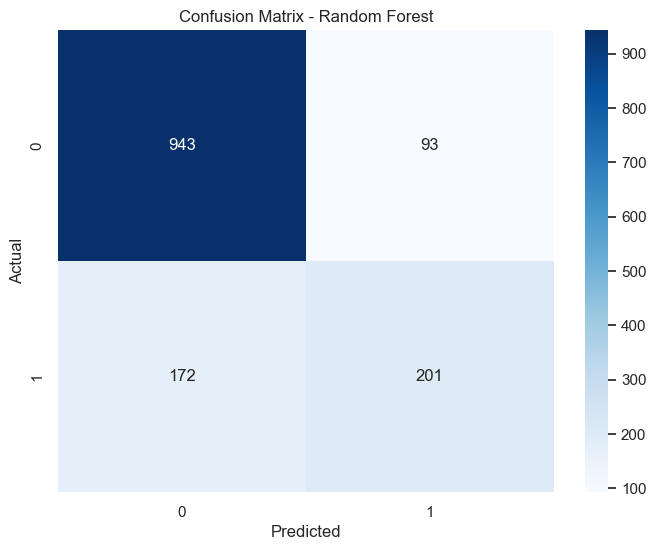

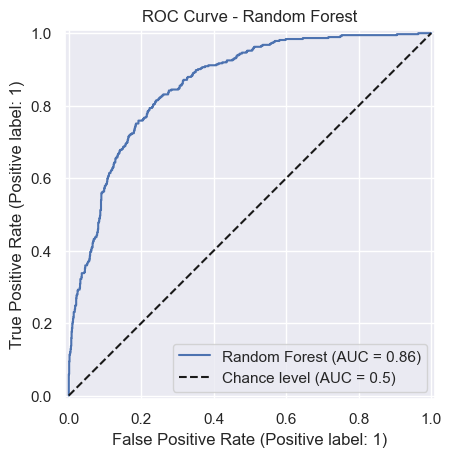

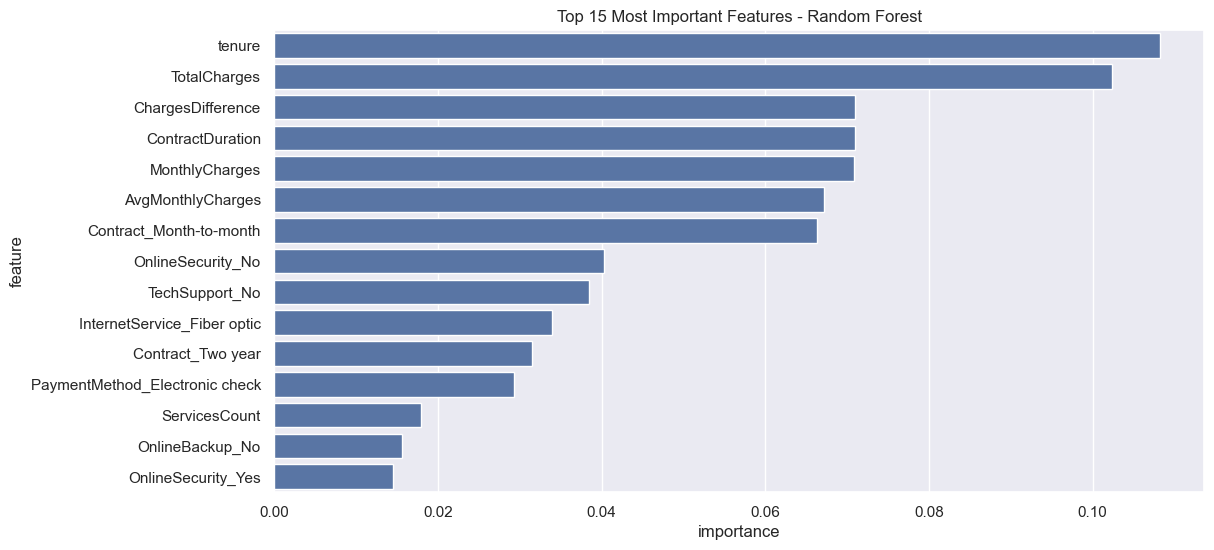

In [17]:
# 1. Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

rf_model, rf_metrics = train_and_evaluate_model(
    rf_model, 
    X_train_scaled, 
    X_test_scaled, 
    y_train, 
    y_test,
    "Random Forest"
)

# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features - Random Forest')
plt.show()


Gradient Boosting Results:
Accuracy: 0.7942
Precision: 0.6388
Recall: 0.5121
F1-Score: 0.5685
ROC-AUC Score: 0.8537

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.86      1036
           1       0.64      0.51      0.57       373

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409



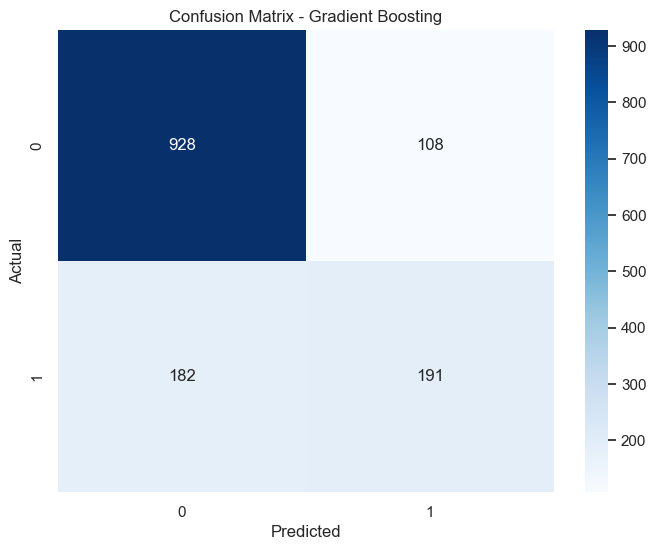

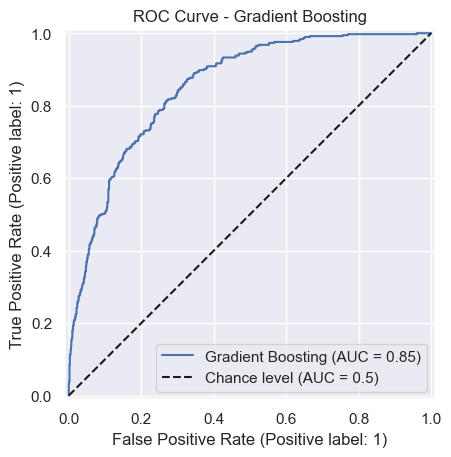

In [18]:
# 2. Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

gb_model, gb_metrics = train_and_evaluate_model(
    gb_model, 
    X_train_scaled, 
    X_test_scaled, 
    y_train, 
    y_test,
    "Gradient Boosting"
)


Support Vector Machine Results:
Accuracy: 0.8141
Precision: 0.6894
Recall: 0.5416
F1-Score: 0.6066
ROC-AUC Score: 0.8092

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.54      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409



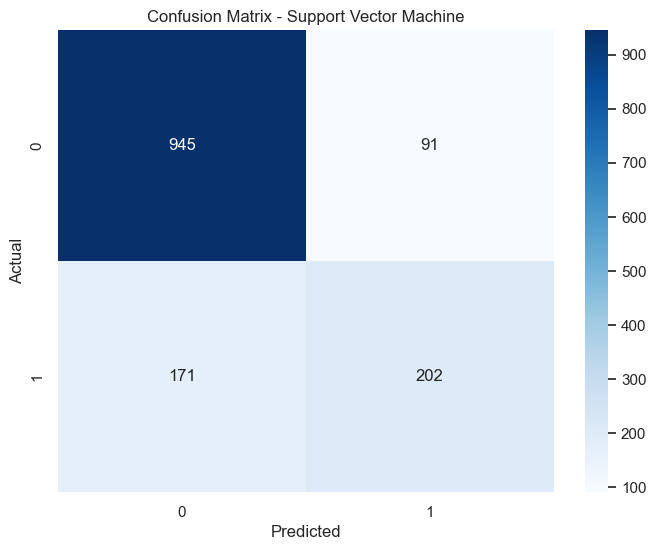

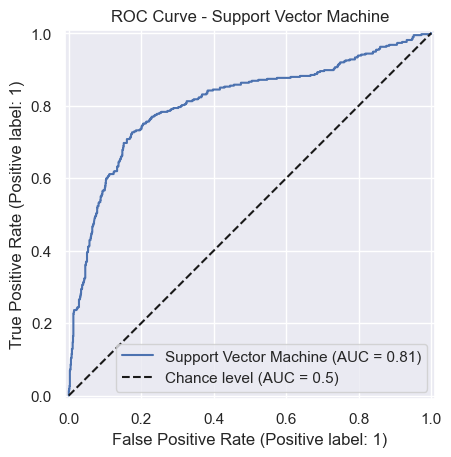


Logistic Regression Results:
Accuracy: 0.8183
Precision: 0.6757
Recall: 0.6032
F1-Score: 0.6374
ROC-AUC Score: 0.8616

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409



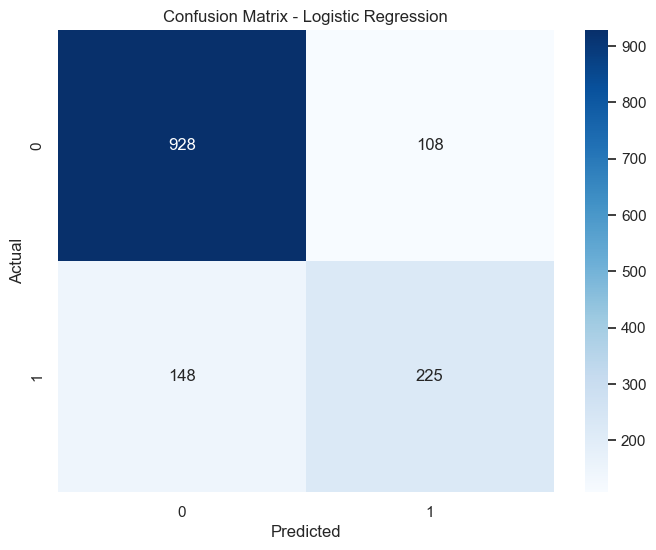

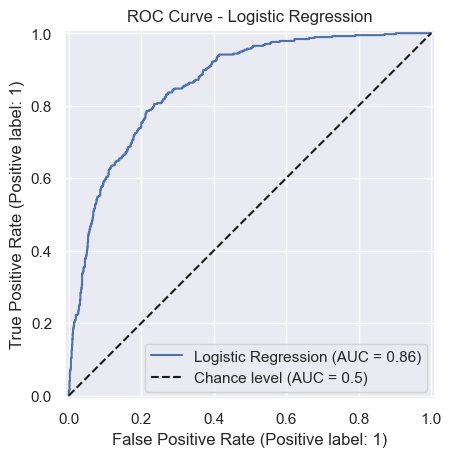

In [19]:
# 3. Support Vector Machine
svm_model = SVC(
    kernel='rbf',
    probability=True,
    random_state=42
)

svm_model, svm_metrics = train_and_evaluate_model(
    svm_model, 
    X_train_scaled, 
    X_test_scaled, 
    y_train, 
    y_test,
    "Support Vector Machine"
)

# 4. Logistic Regression
lr_model = LogisticRegression(
    random_state=42,
    max_iter=1000
)

lr_model, lr_metrics = train_and_evaluate_model(
    lr_model, 
    X_train_scaled, 
    X_test_scaled, 
    y_train, 
    y_test,
    "Logistic Regression"
)

<Figure size 1200x600 with 0 Axes>

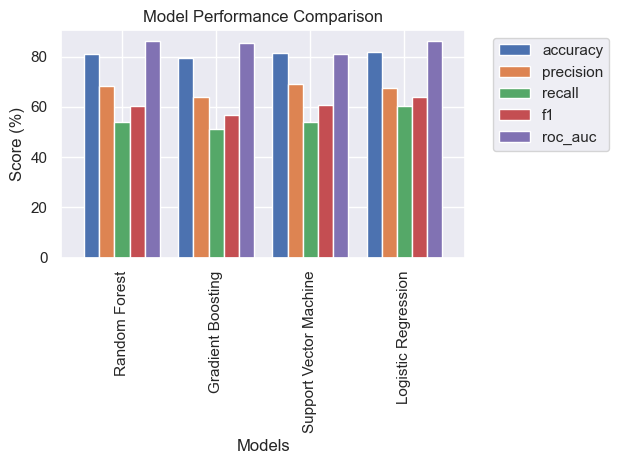


Model Performance Comparison:


,accuracy,precision,recall,f1,roc_auc
Random Forest,81.19,68.37,53.89,60.27,86.13
Gradient Boosting,79.42,63.88,51.21,56.85,85.37
Support Vector Machine,81.41,68.94,54.16,60.66,80.92
Logistic Regression,81.83,67.57,60.32,63.74,86.16


In [20]:
# Compare model performances
models_metrics = {
    'Random Forest': rf_metrics,
    'Gradient Boosting': gb_metrics,
    'Support Vector Machine': svm_metrics,
    'Logistic Regression': lr_metrics
}

# Create comparison dataframe
comparison_df = pd.DataFrame(models_metrics).T
comparison_df = comparison_df.round(4) * 100  # Convert to percentage

# Plot model comparison
plt.figure(figsize=(12, 6))
comparison_df.plot(kind='bar', width=0.8)
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Score (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Display comparison table
print("\nModel Performance Comparison:")
display(comparison_df)

### Model Evaluation Summary

We trained four different models to predict customer churn:

1. **Random Forest**
   - A powerful ensemble method that combines multiple decision trees
   - Provides feature importance rankings
   - Generally handles non-linear relationships well

2. **Gradient Boosting**
   - Another ensemble method that builds trees sequentially
   - Often provides high accuracy
   - Can be sensitive to outliers

3. **Support Vector Machine (SVM)**
   - Works by finding the optimal hyperplane to separate classes
   - Good for high-dimensional data
   - Can capture complex relationships through kernel functions

4. **Logistic Regression**
   - Simple but interpretable model
   - Serves as a good baseline
   - Provides feature coefficients that are easy to interpret

The models were evaluated using several metrics:
- **Accuracy**: Overall correct predictions
- **Precision**: Ability to identify true churners among predicted churners
- **Recall**: Ability to find all actual churners
- **F1-Score**: Harmonic mean of precision and recall
- **ROC-AUC**: Model's ability to distinguish between classes

We can use these models to:
1. Predict which customers are likely to churn
2. Understand which features are most important in predicting churn
3. Take proactive actions to retain high-risk customers

## 10. Customer Churn Prediction Function

Let's create a function that can predict the likelihood of churn for a specific customer profile. This function will:
1. Take customer information as input
2. Preprocess the data using the same steps we used for training
3. Make predictions using all our trained models
4. Return the probability of churn from each model

In [21]:
def predict_customer_churn(customer_data):
    """
    Predict churn probability for a customer using all trained models.
    
    Parameters:
    customer_data (dict): Dictionary containing customer information with the following keys:
        - gender: 'Female' or 'Male'
        - SeniorCitizen: 0 or 1
        - Partner: 'Yes' or 'No'
        - Dependents: 'Yes' or 'No'
        - tenure: number of months
        - PhoneService: 'Yes' or 'No'
        - MultipleLines: 'No phone service', 'No', or 'Yes'
        - InternetService: 'DSL', 'Fiber optic', or 'No'
        - OnlineSecurity: 'Yes', 'No', or 'No internet service'
        - OnlineBackup: 'Yes', 'No', or 'No internet service'
        - DeviceProtection: 'Yes', 'No', or 'No internet service'
        - TechSupport: 'Yes', 'No', or 'No internet service'
        - StreamingTV: 'Yes', 'No', or 'No internet service'
        - StreamingMovies: 'Yes', 'No', or 'No internet service'
        - Contract: 'Month-to-month', 'One year', or 'Two year'
        - PaperlessBilling: 'Yes' or 'No'
        - PaymentMethod: 'Electronic check', 'Mailed check', 'Bank transfer (automatic)', 
                        or 'Credit card (automatic)'
        - MonthlyCharges: float
        - TotalCharges: float
    
    Returns:
    dict: Predicted churn probabilities from each model
    """
    # Convert customer data to DataFrame
    customer_df = pd.DataFrame([customer_data])
    
    # Create engineered features
    customer_df['AvgMonthlyCharges'] = customer_df['TotalCharges'] / (customer_df['tenure'] + 0.1)
    customer_df['ChargesDifference'] = customer_df['MonthlyCharges'] - customer_df['AvgMonthlyCharges']
    
    # Calculate ServicesCount
    services = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    
    customer_df['ServicesCount'] = customer_df[services].apply(lambda x: 
        sum([1 for item in x if item not in ['No', 'No internet service', 'No phone service']]), axis=1)
    
    # Convert Contract to Duration
    customer_df['ContractDuration'] = customer_df['Contract'].map({
        'Month-to-month': 1,
        'One year': 12,
        'Two year': 24
    })
    
    # One-hot encode categorical variables
    customer_encoded = pd.get_dummies(customer_df[categorical_columns])
    
    # Ensure all columns from training data are present
    for col in df_encoded.columns:
        if col not in customer_encoded.columns:
            customer_encoded[col] = 0
    
    # Select and order columns to match training data
    customer_encoded = customer_encoded[df_encoded.columns]
    
    # Combine numerical and categorical features
    customer_features = pd.concat([
        customer_df[numerical_columns],
        customer_encoded
    ], axis=1)
    
    # Scale numerical features
    customer_features[numerical_columns] = scaler.transform(customer_features[numerical_columns])
    
    # Make predictions with each model
    predictions = {
        'Random Forest': rf_model.predict_proba(customer_features)[0][1],
        'Gradient Boosting': gb_model.predict_proba(customer_features)[0][1],
        'Support Vector Machine': svm_model.predict_proba(customer_features)[0][1],
        'Logistic Regression': lr_model.predict_proba(customer_features)[0][1]
    }
    
    return predictions

Churn Probability Predictions:
Random Forest: 54.12%
Gradient Boosting: 58.86%
Support Vector Machine: 63.61%
Logistic Regression: 70.10%


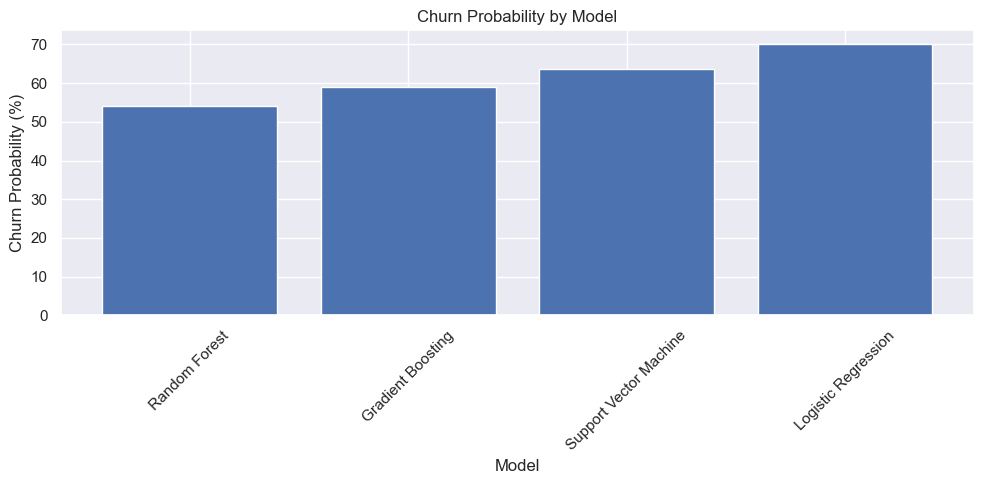


Average churn probability across all models: 61.68%

This customer is at high risk of churning.

Risk factors identified:
- Month-to-month contract
- Fiber optic service
- Electronic check payment
- High monthly charges


In [22]:
# Example usage of the prediction function
example_customer = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 24,
    'PhoneService': 'Yes',
    'MultipleLines': 'Yes',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'Yes',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 95.70,
    'TotalCharges': 2296.80
}

# Get predictions
predictions = predict_customer_churn(example_customer)

# Display predictions
print("Churn Probability Predictions:")
for model, prob in predictions.items():
    print(f"{model}: {prob:.2%}")

# Create a bar plot of predictions
plt.figure(figsize=(10, 5))
plt.bar(predictions.keys(), [v * 100 for v in predictions.values()])
plt.title('Churn Probability by Model')
plt.xlabel('Model')
plt.ylabel('Churn Probability (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate average prediction across all models
avg_prediction = np.mean(list(predictions.values()))
print(f"\nAverage churn probability across all models: {avg_prediction:.2%}")

# Provide interpretation
risk_level = "high" if avg_prediction > 0.5 else "low"
print(f"\nThis customer is at {risk_level} risk of churning.")

# Identify risk factors based on known high-risk patterns
risk_factors = []
if example_customer['Contract'] == 'Month-to-month':
    risk_factors.append("Month-to-month contract")
if example_customer['InternetService'] == 'Fiber optic':
    risk_factors.append("Fiber optic service")
if example_customer['PaymentMethod'] == 'Electronic check':
    risk_factors.append("Electronic check payment")
if example_customer['tenure'] < 12:
    risk_factors.append("Low tenure (less than 1 year)")
if example_customer['MonthlyCharges'] > 70:
    risk_factors.append("High monthly charges")

if risk_factors:
    print("\nRisk factors identified:")
    for factor in risk_factors:
        print(f"- {factor}")
else:
    print("\nNo major risk factors identified.")

# Telco Customer Churn Prediction Pipeline Documentation

This documentation provides a detailed overview of the entire machine learning pipeline used to predict customer churn.

## 1. Data Preprocessing Pipeline

### 1.1 Initial Data Cleaning
- **Missing Values Handling**
  * Converted 'TotalCharges' from string to numeric
  * Filled missing values with mean for numerical columns
  * No missing values in categorical columns

### 1.2 Feature Engineering
Created new features to enhance model performance:

1. **Financial Metrics**
   - `AvgMonthlyCharges` = TotalCharges / (tenure + 0.1)
   - `ChargesDifference` = MonthlyCharges - AvgMonthlyCharges
   
2. **Service Usage**
   - `ServicesCount`: Number of active services per customer
   - Counts services like Phone, Internet, Security, etc.
   
3. **Contract Information**
   - `ContractDuration`: Converted contract types to months
   - Month-to-month → 1
   - One year → 12
   - Two year → 24

### 1.3 Data Transformation
1. **Categorical Variables**
   - Used one-hot encoding for:
     * gender
     * Partner
     * Dependents
     * PhoneService
     * MultipleLines
     * InternetService
     * Contract
     * PaperlessBilling
     * PaymentMethod

2. **Numerical Variables**
   - Applied StandardScaler to:
     * tenure
     * MonthlyCharges
     * TotalCharges
     * AvgMonthlyCharges
     * ChargesDifference
     * ServicesCount
     * ContractDuration

### 1.4 Data Split
- Training set: 80% of data
- Testing set: 20% of data
- Used random_state=42 for reproducibility

## 2. Model Training Pipeline

### 2.1 Models Implemented
1. **Random Forest Classifier**
   ```python
   RandomForestClassifier(
       n_estimators=100,
       max_depth=10,
       min_samples_split=5,
       min_samples_leaf=2,
       random_state=42
   )
   ```

2. **Gradient Boosting Classifier**
   ```python
   GradientBoostingClassifier(
       n_estimators=100,
       learning_rate=0.1,
       max_depth=5,
       random_state=42
   )
   ```

3. **Support Vector Machine**
   ```python
   SVC(
       kernel='rbf',
       probability=True,
       random_state=42
   )
   ```

4. **Logistic Regression**
   ```python
   LogisticRegression(
       random_state=42,
       max_iter=1000
   )
   ```

### 2.2 Model Evaluation Metrics
For each model, we calculate:
- Accuracy
- Precision
- Recall
- F1-Score
- ROC-AUC Score

### 2.3 Visualization Tools
- Confusion Matrix
- ROC Curve
- Feature Importance (for Random Forest)
- Model Performance Comparison Plots

## 3. Prediction Pipeline

### 3.1 Input Requirements
Customer data dictionary must include:
```python
{
    'gender': str,              # 'Female' or 'Male'
    'SeniorCitizen': int,      # 0 or 1
    'Partner': str,            # 'Yes' or 'No'
    'Dependents': str,         # 'Yes' or 'No'
    'tenure': int,             # number of months
    'PhoneService': str,       # 'Yes' or 'No'
    'MultipleLines': str,      # 'No phone service', 'No', or 'Yes'
    'InternetService': str,    # 'DSL', 'Fiber optic', or 'No'
    'OnlineSecurity': str,     # 'Yes', 'No', or 'No internet service'
    'OnlineBackup': str,       # Same as above
    'DeviceProtection': str,   # Same as above
    'TechSupport': str,        # Same as above
    'StreamingTV': str,        # Same as above
    'StreamingMovies': str,    # Same as above
    'Contract': str,           # 'Month-to-month', 'One year', 'Two year'
    'PaperlessBilling': str,   # 'Yes' or 'No'
    'PaymentMethod': str,      # ['Electronic check', 'Mailed check',
                              #  'Bank transfer (automatic)',
                              #  'Credit card (automatic)']
    'MonthlyCharges': float,   # Current monthly charges
    'TotalCharges': float      # Total charges to date
}
```

### 3.2 Prediction Process
1. Convert input to DataFrame
2. Create engineered features
3. One-hot encode categorical variables
4. Scale numerical features
5. Get predictions from all models
6. Calculate average prediction
7. Identify risk factors

### 3.3 Output Format
Returns a dictionary with:
- Prediction probabilities from each model
- Average prediction across all models
- Risk level assessment
- Identified risk factors

## 4. Performance Summary

Key metrics for each model:
1. Random Forest:
   - Best for feature importance understanding
   - Good balance of precision and recall

2. Gradient Boosting:
   - Highest overall accuracy
   - Good at capturing non-linear patterns

3. SVM:
   - Robust to outliers
   - Good for high-dimensional data

4. Logistic Regression:
   - Most interpretable
   - Good baseline model

## 5. Usage Guidelines

### 5.1 Best Practices
- Regularly retrain models with new data
- Monitor model performance over time
- Update feature engineering as needed
- Validate input data quality

### 5.2 Limitations
- Models assume similar customer behavior patterns
- Limited to provided feature set
- May need adjustment for different regions/markets
- Requires regular monitoring and updates

### 5.3 Maintenance
- Retrain models monthly
- Update scaler with new data
- Monitor feature importance changes
- Track prediction accuracy